In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import numpy as np

In [39]:
# set pandas options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\asus\AppData\Local\Temp\ipykernel_34488\3808987419.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [40]:
df = pd.read_csv('CompanyData.txt', sep='\t', encoding='utf-16')

In [41]:
df.head()

,EmployeeID,First_Name,Surname,StreetAddress,City,State,StateFull,ZipCode,Country,CountryFull,Age,Office,Start_Date,Termination_Date,Office_Type,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile,Notes
0,100001,Patrice,Moore,1427 Buckhannan Avenue,North Syracuse,NY,New York,13212,US,United States,35,NYC,5/4/2009,12/12/2999,Corporate,Corporate,USD,1.00,CEO,1/5/1986,CSuite,500000,1,JP_1000,Changes for 2021.06:
1,100002,David,Rickards,4265 Graystone Lakes,Macon,GA,Georgia,31206,US,United States,49,NYC,5/4/2009,12/12/2999,Corporate,Corporate,USD,0.20,HR Manager,7/13/1971,Manager,70000,1,JP_1001,Changes for 2021.06:
2,100003,Grace,Maldonado,1680 Hudson Street,Weehawken,NJ,New Jersey,07087,US,United States,32,NYC,5/18/2009,6/5/2013,Corporate,Marketing,USD,0.15,Graphic Designer,1/25/1989,Individual Contributor,77000,0,JP_1022,Changes for 2021.06:
3,100004,Justin,Edgin,1262 Limer Street,Rome,GA,Georgia,30165,US,United States,25,Boulder,6/22/2009,10/16/2013,Corporate,Technology,USD,0.50,CTO,5/1/1996,CSuite,400000,0,JP_1036,Changes for 2021.06:
4,100005,Benjamin,Vargas,2431 Rainbow Road,Santa Ana,CA,California,92705,US,United States,49,NYC,7/13/2009,1/10/2011,Corporate,Customer Service,USD,0.15,Associate Account Manager,5/5/1972,Manager,51000,0,JP_1015,Changes for 2021.06:


In [42]:
df.shape

(4968, 25)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4968 entries, 0 to 4967
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        4968 non-null   int64  
 1   First_Name        4968 non-null   object 
 2   Surname           4968 non-null   object 
 3   StreetAddress     4846 non-null   object 
 4   City              4846 non-null   object 
 5   State             4446 non-null   object 
 6   StateFull         4445 non-null   object 
 7   ZipCode           4968 non-null   object 
 8   Country           4968 non-null   object 
 9   CountryFull       4968 non-null   object 
 10  Age               4968 non-null   int64  
 11  Office            4968 non-null   object 
 12  Start_Date        4968 non-null   object 
 13  Termination_Date  4968 non-null   object 
 14  Office_Type       4968 non-null   object 
 15  Department        4968 non-null   object 
 16  Currency          4968 non-null   object 


In [44]:
df.isnull().sum()

EmployeeID          0  
First_Name          0  
Surname             0  
StreetAddress       122
City                122
State               522
StateFull           523
ZipCode             0  
Country             0  
CountryFull         0  
Age                 0  
Office              0  
Start_Date          0  
Termination_Date    0  
Office_Type         0  
Department          0  
Currency            0  
Bonus_pct           0  
Job_title           0  
DOB                 0  
level               0  
Salary              0  
Active Status       0  
Job_Profile         0  
Notes               0  
dtype: int64

In [45]:
df.columns

Index(['EmployeeID', 'First_Name', 'Surname', 'StreetAddress', 'City', 'State',
       'StateFull', 'ZipCode', 'Country', 'CountryFull', 'Age', 'Office',
       'Start_Date', 'Termination_Date', 'Office_Type', 'Department',
       'Currency', 'Bonus_pct', 'Job_title', 'DOB', 'level', 'Salary',
       'Active Status', 'Job_Profile', 'Notes'],
      dtype='object')

In [46]:
# Menampilkan value counts tiap kolom tertentu\
selected_column = ['Country', 'CountryFull', 'Office', 'Office_Type', 'Department', 'Currency', 'Bonus_pct', 'Job_title', 'level', 'Active Status', 'Job_Profile']
for column in df[selected_column]:
    value_counts = df[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print()

Value counts for column 'Country':
US    4446
GB    250 
NO    150 
HK    72  
JP    50  
Name: Country, dtype: int64

Value counts for column 'CountryFull':
United States     4446
United Kingdom    250 
Norway            150 
Hong Kong         72  
Japan             50  
Name: CountryFull, dtype: int64

Value counts for column 'Office':
NYC         1796
Boulder     1633
SanJose     917 
London      250 
Oslo        150 
HongKong    72  
SanFran     53  
Tokyo       50  
Austin      47  
Name: Office, dtype: int64

Value counts for column 'Office_Type':
Corporate     2972
Technology    1996
Name: Office_Type, dtype: int64

Value counts for column 'Department':
Technology          1915
Customer Service    1218
Sales               849 
Corporate           555 
Marketing           431 
Name: Department, dtype: int64

Value counts for column 'Currency':
USD    4446
GBP    250 
NOK    150 
HKD    72  
JPY    50  
Name: Currency, dtype: int64

Value counts for column 'Bonus_pct':
0.15    376

Berikut adalah penjelasan umum mengenai arti gelar atau posisi dalam konteks perusahaan:

1. Individual Contributor: Merujuk pada posisi di mana seseorang bekerja secara mandiri dan bertanggung jawab atas tugas-tugas tertentu dalam organisasi. Mereka tidak memiliki tanggung jawab langsung terhadap manajemen atau pengawasan staf lain.

2. Senior: Merupakan tingkatan atau level di atas posisi dasar. Biasanya menunjukkan tingkat pengalaman yang lebih tinggi atau tanggung jawab yang lebih besar dibandingkan dengan tingkatan yang lebih rendah.

3. Associate: Merupakan tingkatan awal atau tingkatan entry-level dalam sebuah perusahaan. Biasanya diberikan kepada karyawan baru atau yang memiliki sedikit pengalaman dalam industri tersebut.

4. Manager: Merupakan posisi manajerial yang bertanggung jawab atas mengawasi dan memimpin tim atau departemen tertentu. Mereka memiliki tanggung jawab untuk mengelola kinerja staf, mengambil keputusan, dan mencapai tujuan yang telah ditetapkan.

5. Director: Merupakan posisi manajerial yang berada di atas tingkat manajer. Direktur biasanya memiliki tanggung jawab yang lebih besar dalam mengelola tim atau departemen yang lebih besar, dan mereka berperan dalam mengambil keputusan strategis untuk perusahaan.

6. VP (Vice President): Merupakan posisi tingkat eksekutif yang berada di atas direktur. VP memiliki tanggung jawab yang lebih luas dan sering kali terlibat dalam pengambilan keputusan strategis perusahaan.

7. SVP (Senior Vice President): Merupakan posisi tingkat eksekutif yang lebih tinggi daripada VP. SVP memiliki tanggung jawab yang lebih besar dalam memimpin dan mengawasi berbagai aspek strategis perusahaan.

8. C-Suite: Merupakan kelompok eksekutif tertinggi dalam sebuah perusahaan, yang terdiri dari Chief Executive Officer (CEO), Chief Financial Officer (CFO), Chief Operating Officer (COO), dan sebagainya. Mereka memiliki wewenang tertinggi dalam pengambilan keputusan strategis dan pengelolaan perusahaan.

In [47]:
# Menampilkan data yang memiliki nilai yang hilang
missing_data = df[df.isnull().any(axis=1)]
print("\nData dengan Missing Value:")
missing_data.head()


Data dengan Missing Value:


,EmployeeID,First_Name,Surname,StreetAddress,City,State,StateFull,ZipCode,Country,CountryFull,Age,Office,Start_Date,Termination_Date,Office_Type,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile,Notes
54,100055,Sander,Klokk,Snekkerfaret 216,MOSS,NaN,NaN,01537,NO,Norway,39,Oslo,2/22/2010,8/19/2019,Technology,Technology,NOK,0.15,Software Engineer,2/14/1982,Individual Contributor,537000,0,JP_1038,Changes for 2021.06:
62,100063,Marius,Andersen,Bnntjernveien 186,HNEFOSS,NaN,NaN,03514,NO,Norway,28,Oslo,3/15/2010,8/16/2022,Technology,Technology,NOK,0.15,Senior Software Engineer,3/1/1993,Senior,534000,1,JP_1040,Changes for 2021.06: Termed
105,100106,Anna,Grande,Bugrden 57,BERGEN,NaN,NaN,05003,NO,Norway,60,Oslo,6/28/2010,12/12/2999,Technology,Technology,NOK,0.15,Software Engineer,5/19/1961,Individual Contributor,539000,1,JP_1038,Changes for 2021.06:
113,100114,Emilie,Meland,Gjerlwsveien 224,GRESSVIK,NaN,NaN,01621,NO,Norway,43,Oslo,7/19/2010,12/12/2999,Technology,Technology,NOK,0.15,Software Engineer,10/18/1977,Individual Contributor,541000,1,JP_1038,Changes for 2021.06:
126,100127,Amina,Amundsen,Krokveien 223,HAGAN,NaN,NaN,01481,NO,Norway,48,Oslo,8/9/2010,12/12/2999,Technology,Technology,NOK,0.15,Senior Software Engineer,5/7/1973,Senior,533000,1,JP_1040,Changes for 2021.06:


In [48]:
# Mengubah kolom 'Start_Date' dan 'DateofBirth' menjadi tipe data datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['DOB'] = pd.to_datetime(df['DOB'])

# Menghitung selisih antara 'Start_Date' dan 'DateofBirth' (Usia  masuk kerja karyawan) dalam tahun 
df['StartAge'] = (df['Start_Date'].dt.year - df['DOB'].dt.year)

In [49]:
# Mendefinisikan batas IQR untuk outlier
lower_threshold = 0.25
upper_threshold = 0.75

# Mengidentifikasi outlier untuk setiap kolom dalam DataFrame
outliers = {}
for column in df.columns:
    if df[column].dtype != 'object':
        q1 = df[column].quantile(lower_threshold)
        q3 = df[column].quantile(upper_threshold)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].tolist()

# Menampilkan hasil outlier
for column, values in outliers.items():
    print(f"Outliers in '{column}':")
    print(values)
    print()

Outliers in 'EmployeeID':
[]

Outliers in 'Age':
[89, 89, 88, 85, 90, 85, 85, 86, 88, 87]

Outliers in 'Start_Date':
[]

Outliers in 'Bonus_pct':
[1.0, 0.2, 0.5, 0.2, 0.2, 0.2, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.1, 0.1, 0.2, 0.1, 0.2, 0.3, 0.2, 0.1, 0.2, 0.2, 0.2, 0.2, 0.3, 0.1, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.3, 0.2, 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3, 0.1, 0.2, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.2, 0.2, 0.3, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.3, 0.2, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.3, 0.1, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2, 0.1, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.3, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2, 0.2

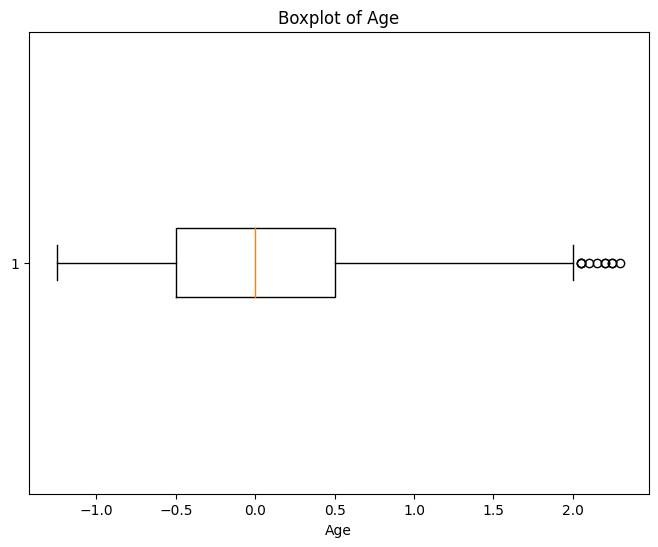

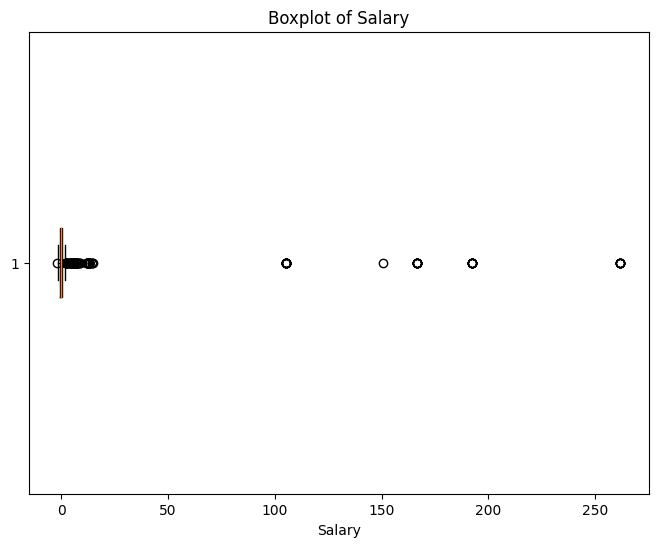

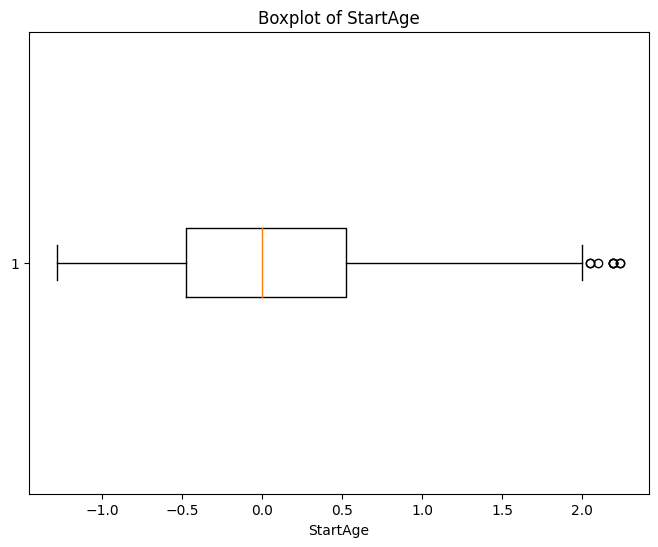

In [54]:
# Mendefinisikan variabel-variabel yang ingin dianalisis untuk outlier
variables = ['Age', 'Salary', 'StartAge']

# Membuat boxplot untuk setiap variabel
for var in variables:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[var], vert=False)
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.show()

Terdapat nilai yang outliers dari variabel-variabel tersebut, namun adanya outlier tersebut mengandung informasi yang penting, sehingga tidak perlu dihapus

In [55]:
# Mendefinisikan kolom-kolom yang perlu dinormalisasi
numeric_columns = ['Age', 'Salary', 'StartAge']

# Membuat objek RobustScaler
scaler = RobustScaler()

# Melakukan normalisasi pada setiap kolom numerik
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

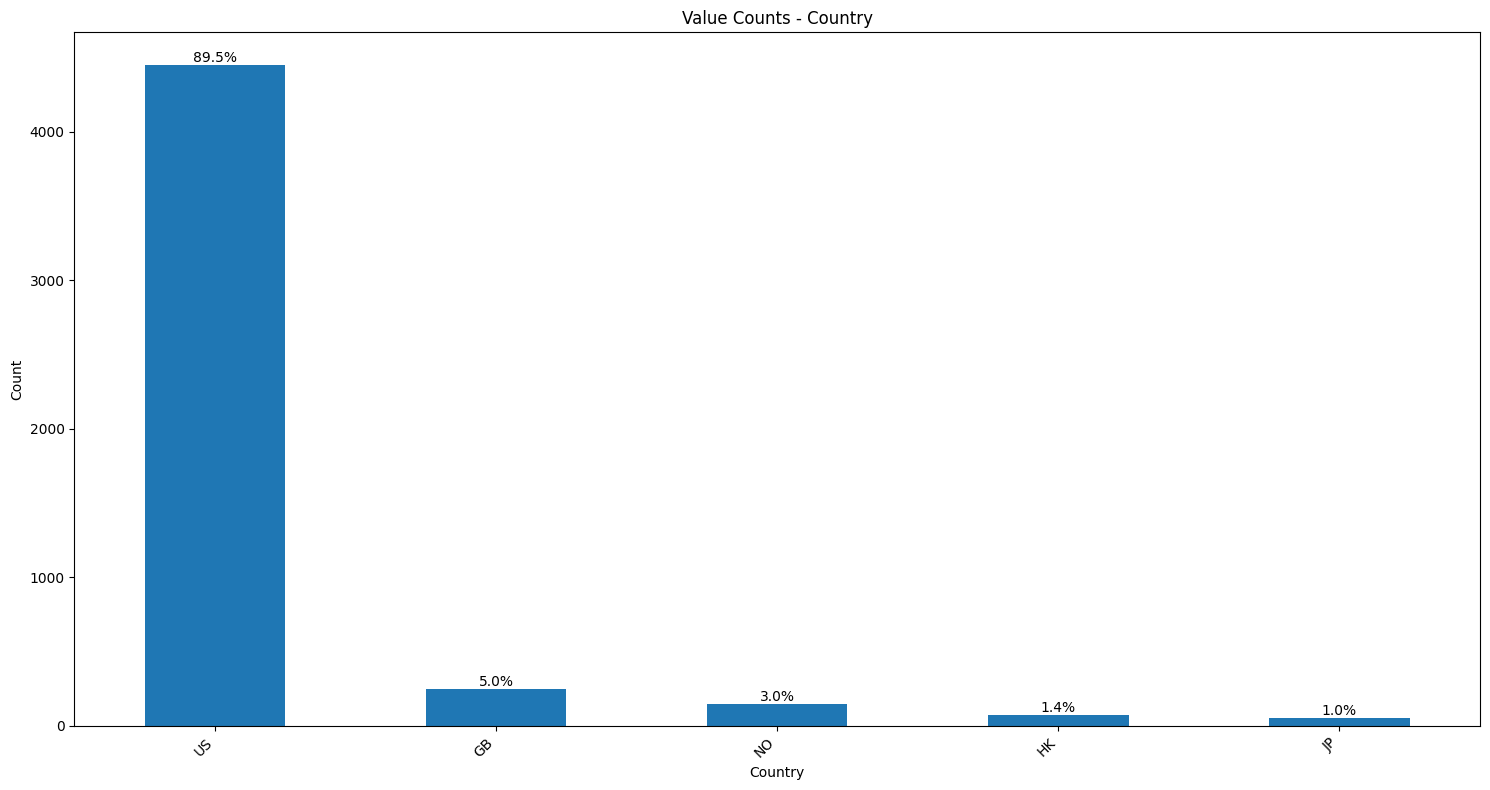

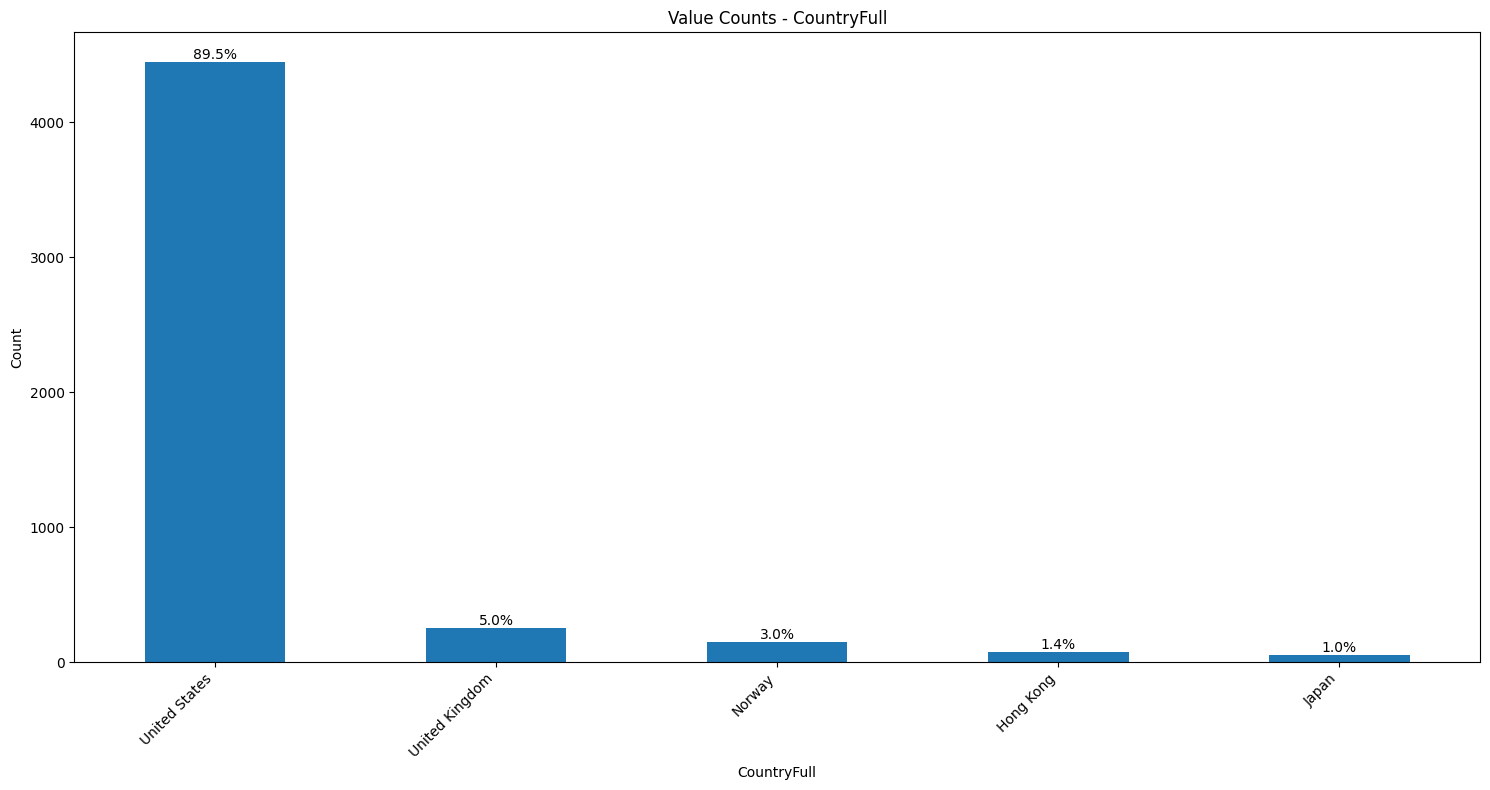

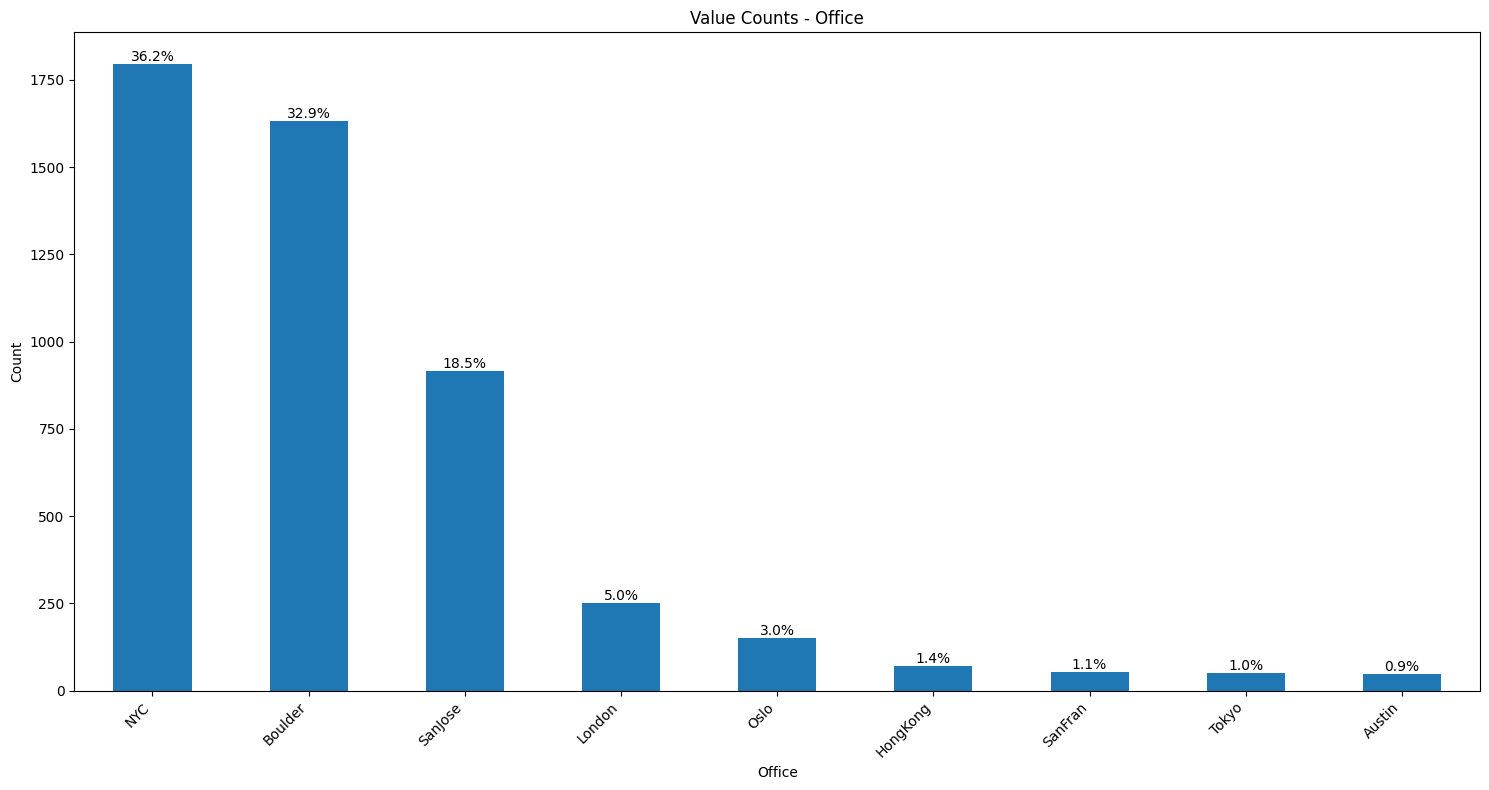

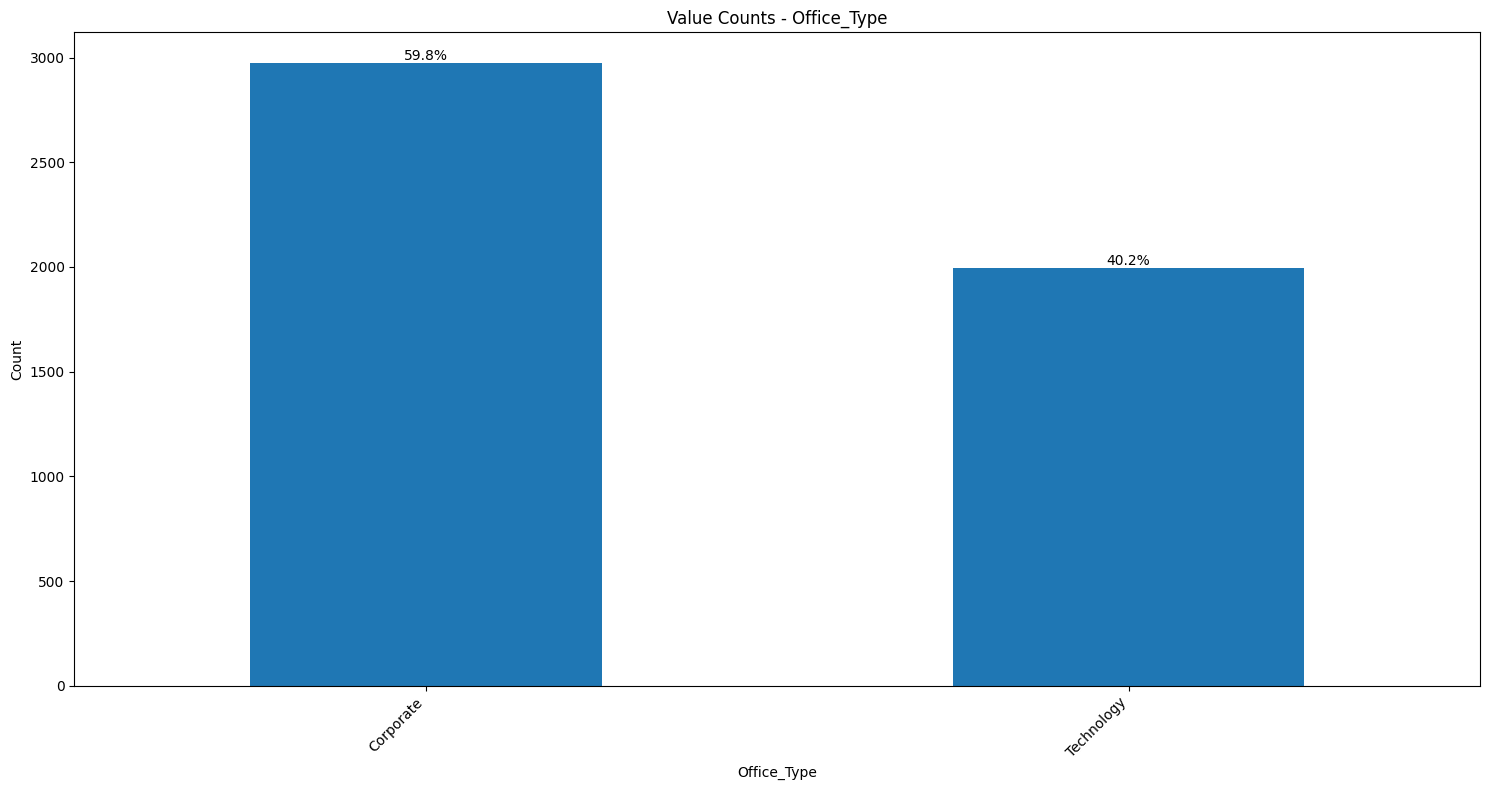

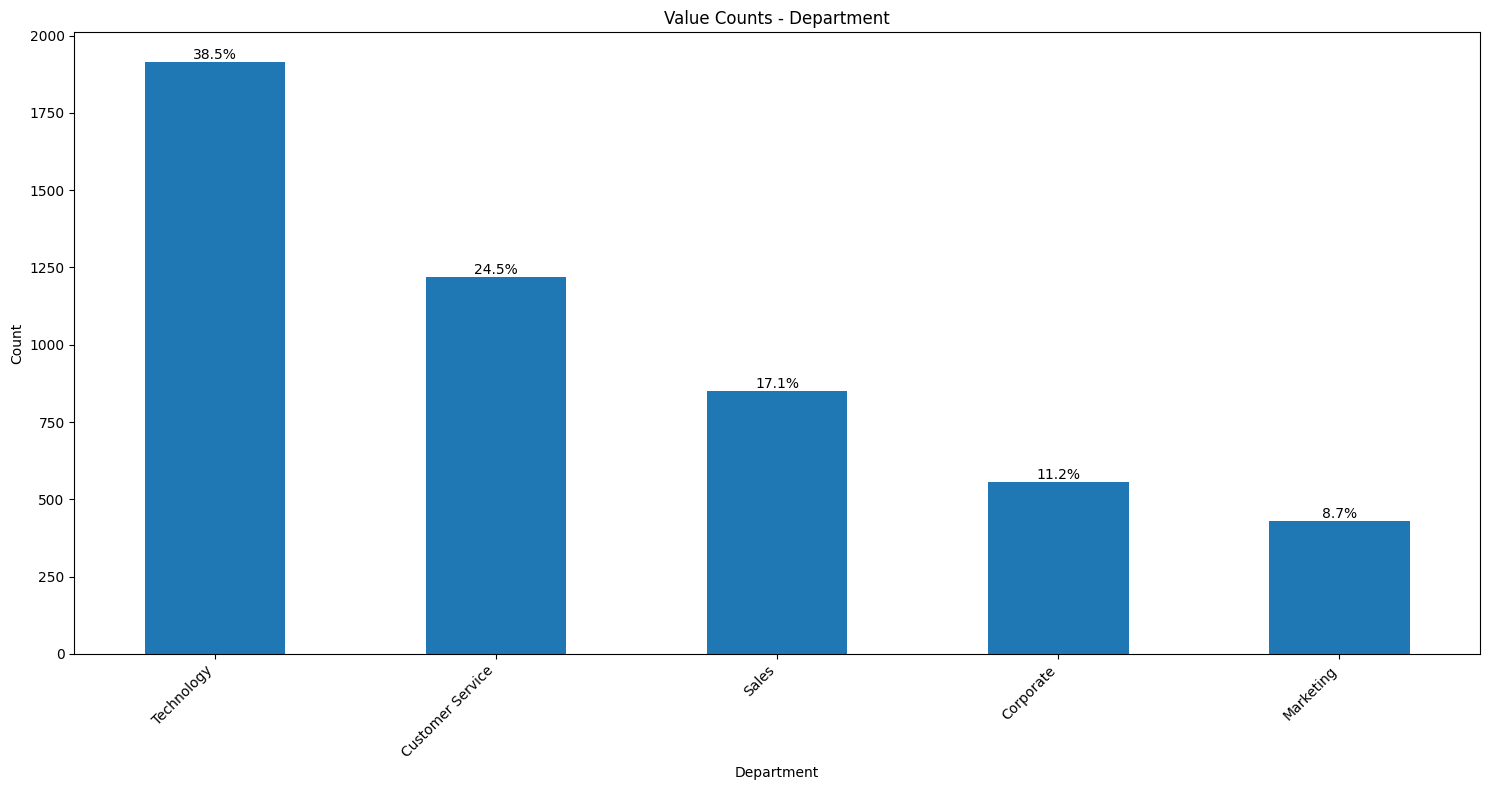

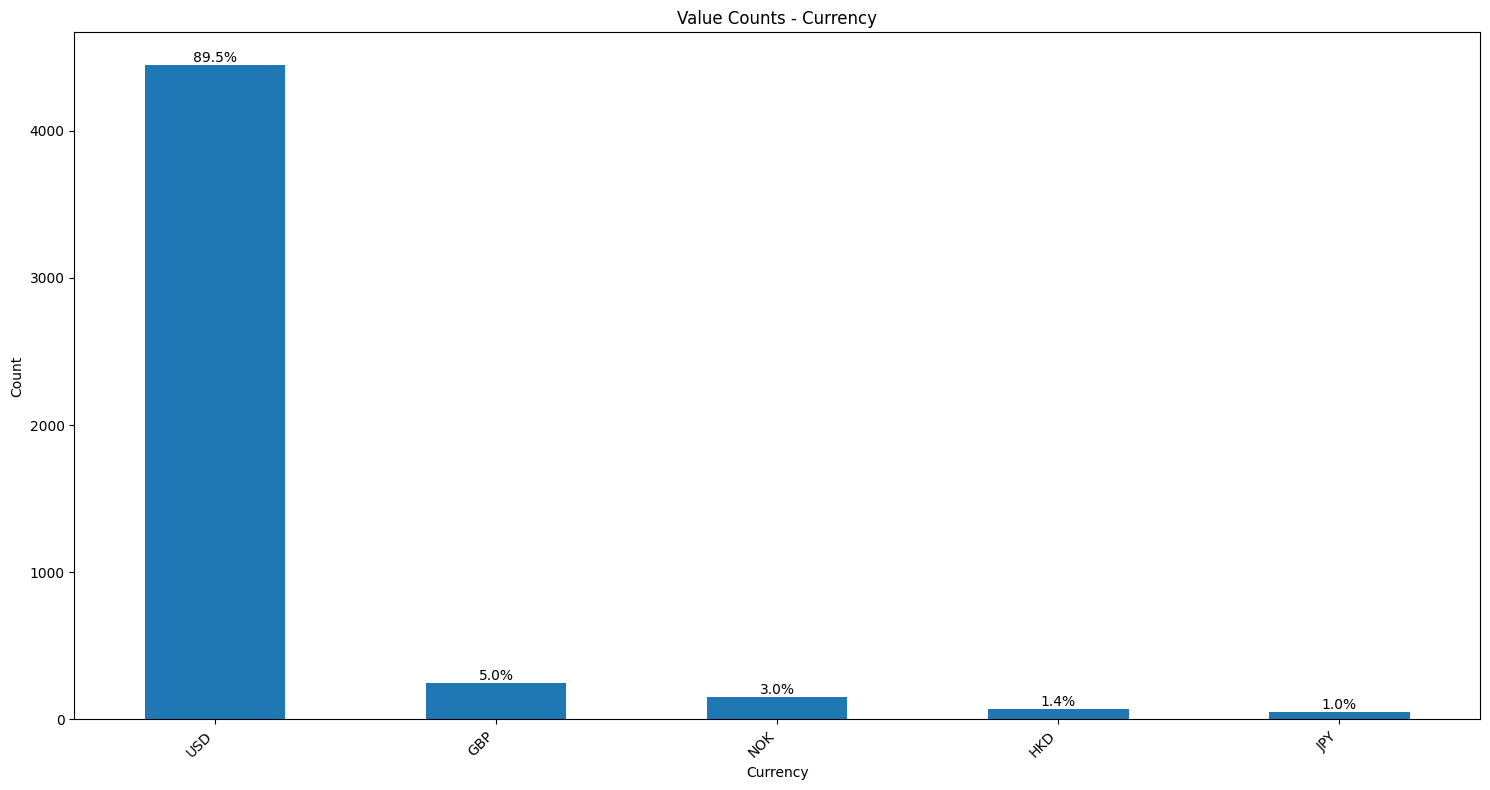

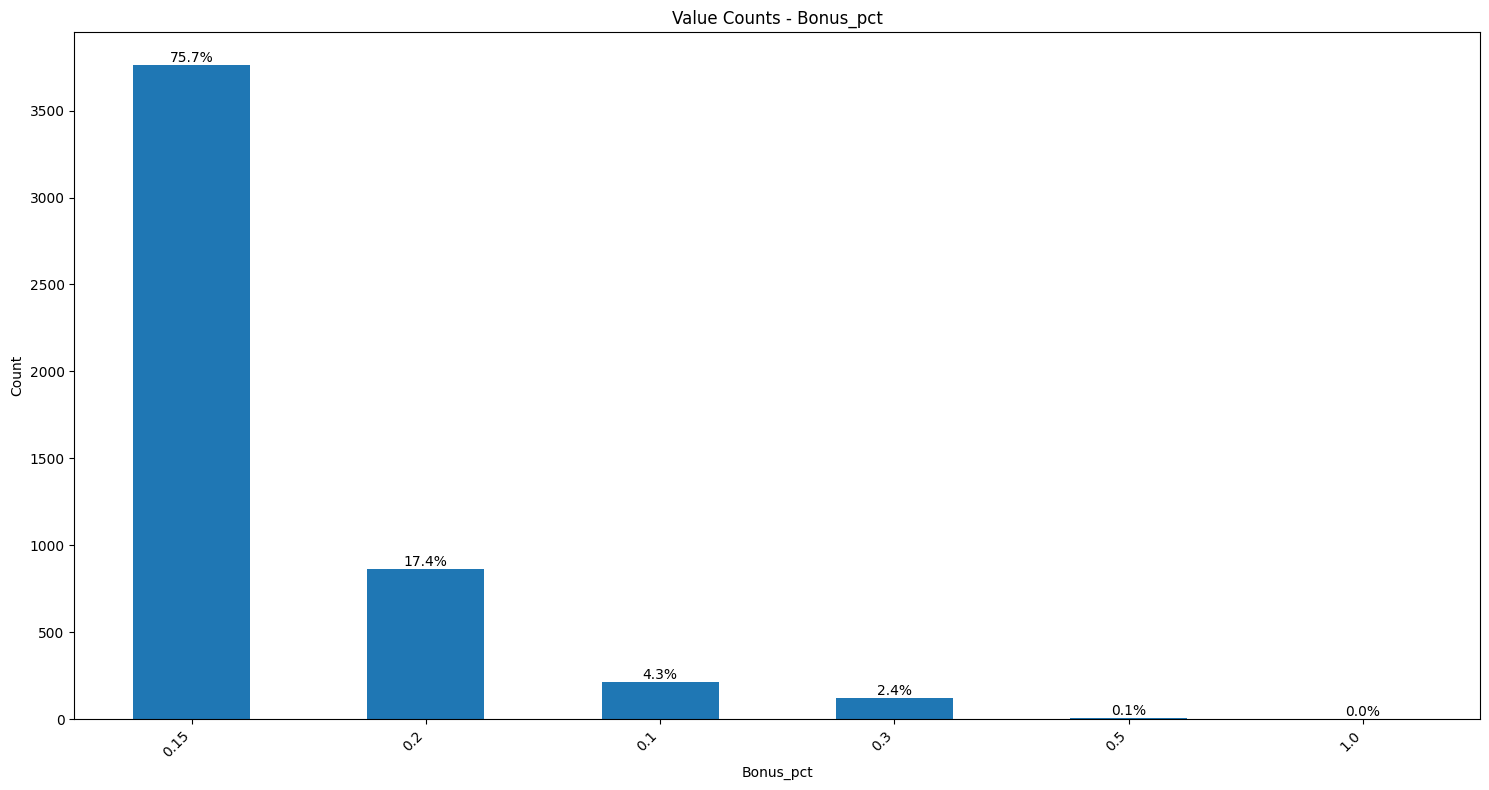

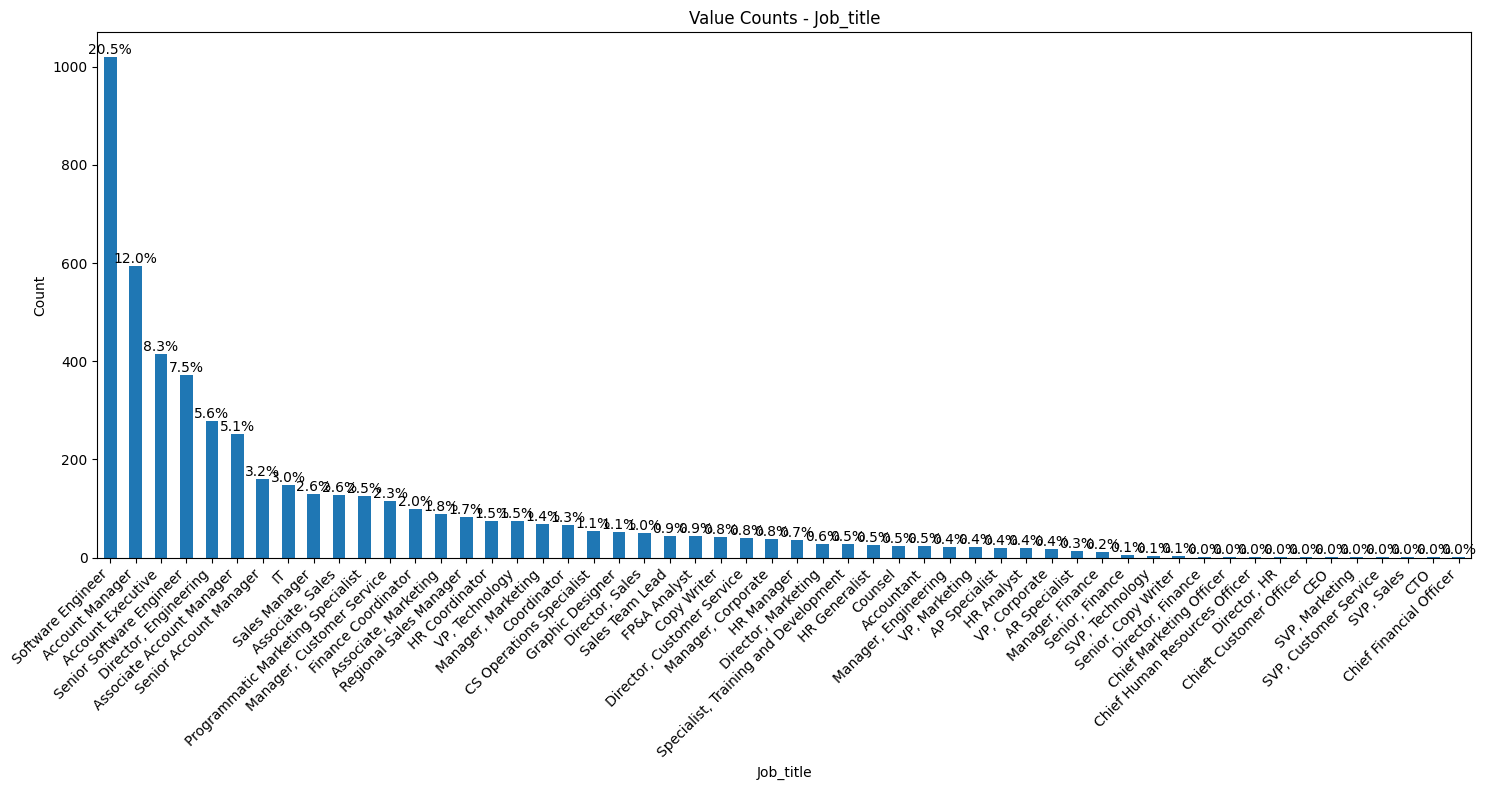

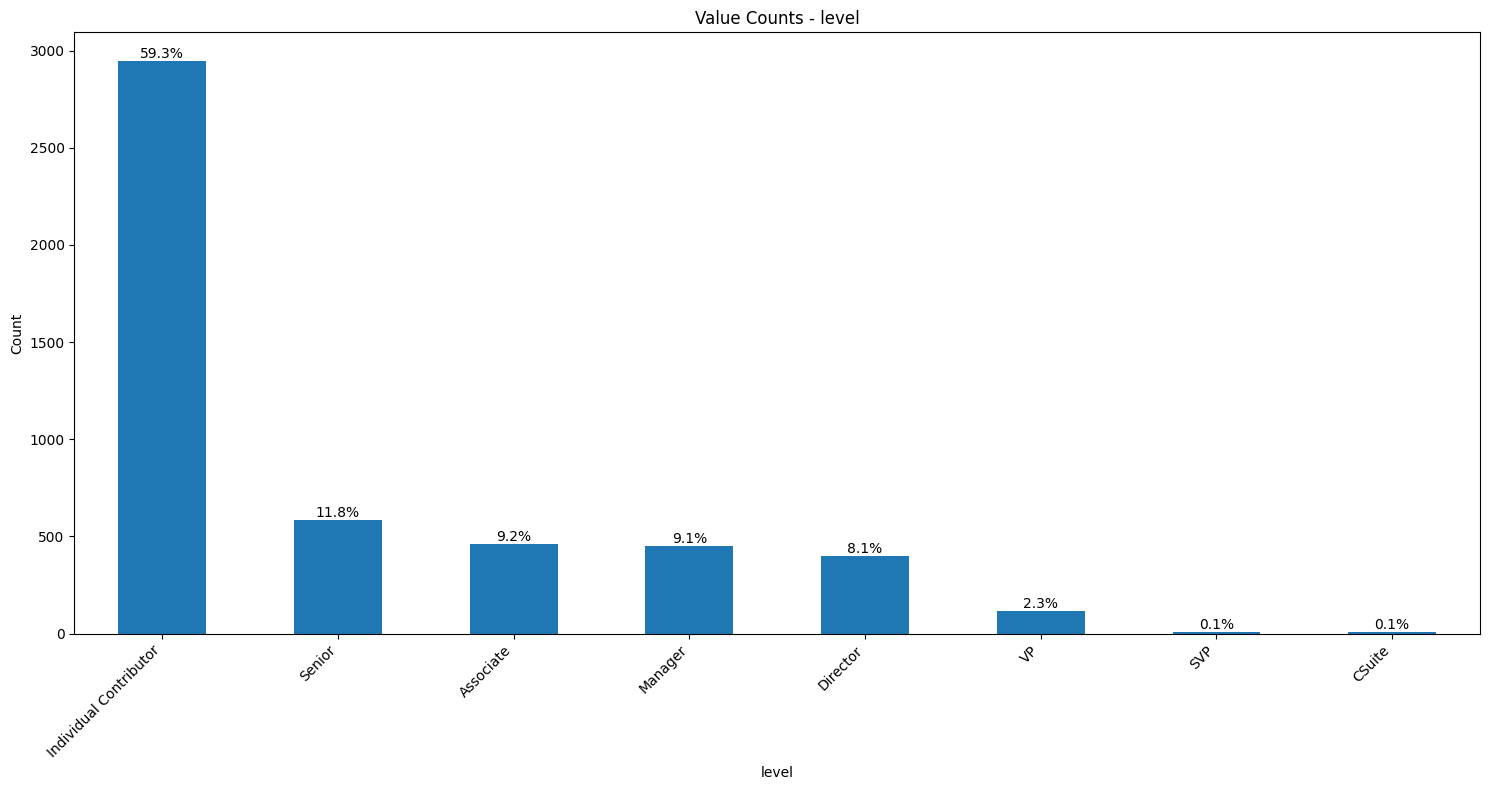

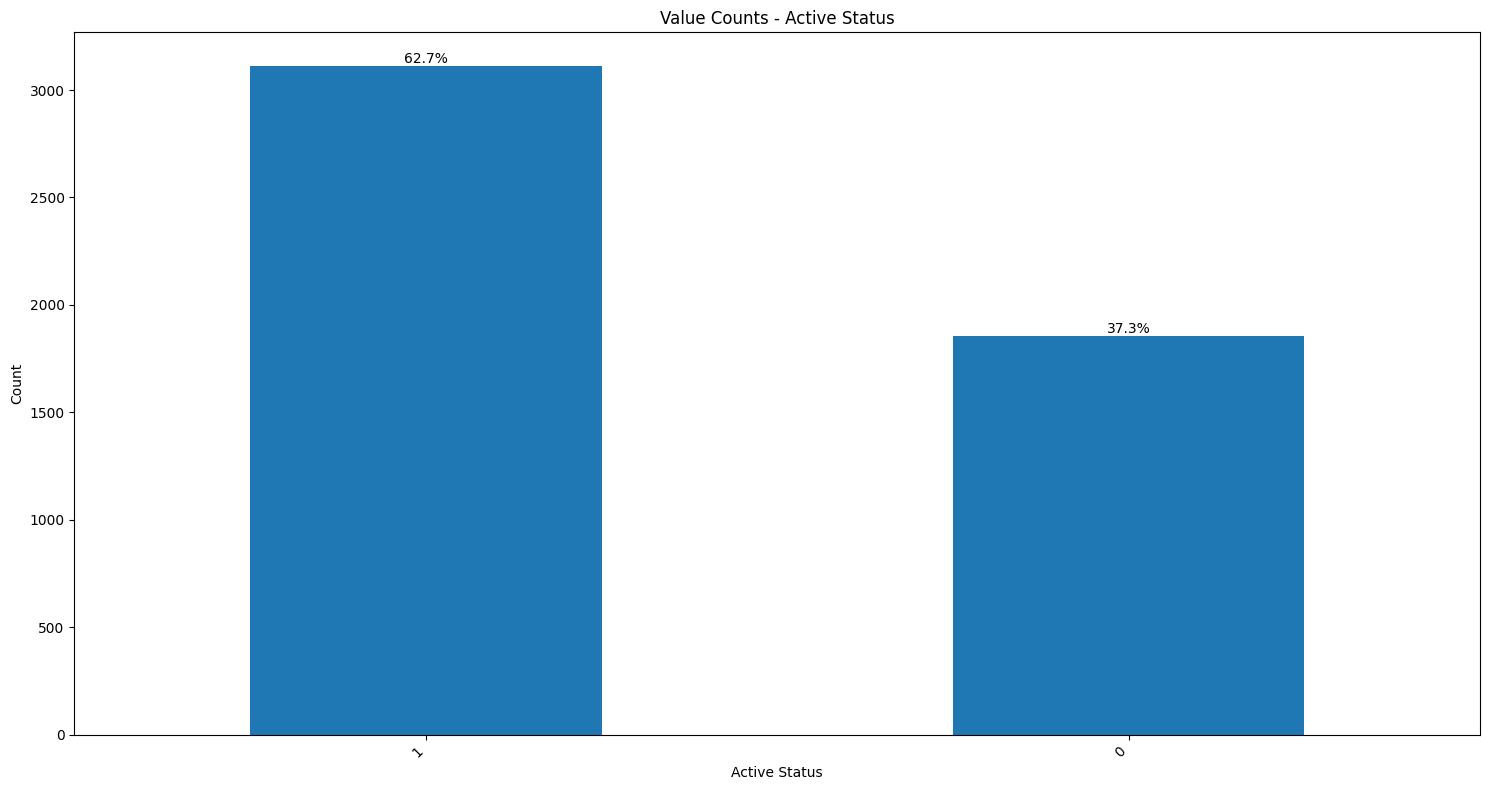

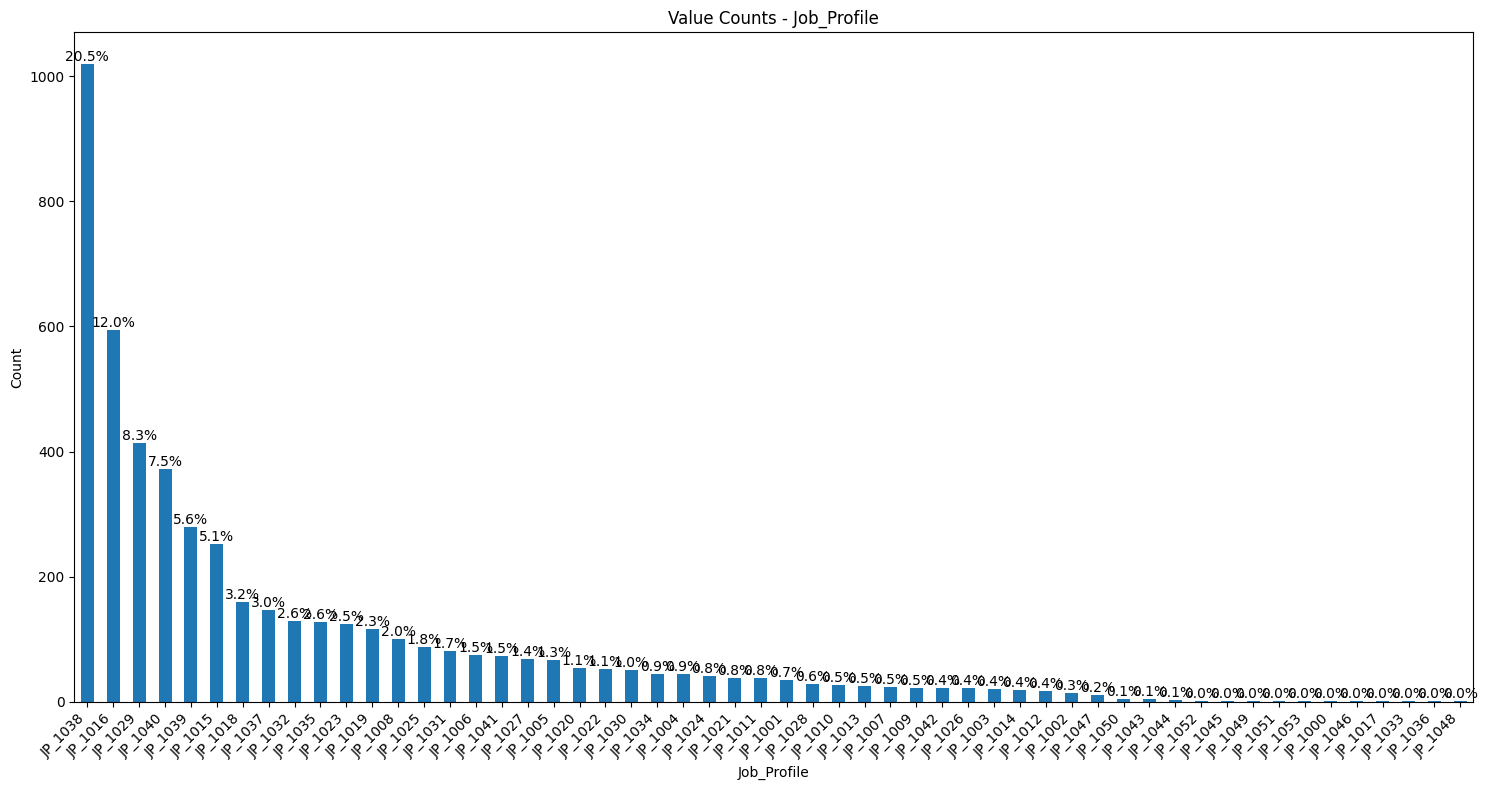

In [57]:
# Menghitung jumlah baris dalam DataFrame
num_rows = df.shape[0]

# Menampilkan visualisasi untuk setiap variabel
for column in df[selected_column]:
    plt.figure(figsize=(15, 8))  # Ukuran plot dapat disesuaikan
    value_counts = df[column].value_counts().sort_values(ascending=False)
    ax = value_counts.plot(kind='bar')
    
    # Menambahkan label pada setiap bar
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x, y = p.get_xy()
        ax.annotate(f'{height/num_rows:.1%}', (x + width/2, y + height), ha='center', va='bottom')

    # Menyesuaikan penamaan label sumbu x agar dapat terbaca dengan jelas
    plt.xticks(rotation=45, ha='right')
    
    # Memberikan judul dan label pada sumbu x dan y
    plt.title(f"Value Counts - {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    
    plt.tight_layout()
    plt.show()

# Analisis Rertensi Karyawan

Analisis retensi karyawan adalah proses untuk memahami faktor-faktor yang mempengaruhi karyawan untuk tetap bekerja di perusahaan atau memilih untuk mengundurkan diri. Tujuan utama dari analisis retensi karyawan adalah untuk mengidentifikasi pola, tren, dan variabel penting yang dapat digunakan untuk memprediksi kemungkinan seorang karyawan akan bertahan atau pergi dari perusahaan.

In [58]:
# Show Data and use insigthful variables
data = df.copy().drop_duplicates().drop(['EmployeeID', 'First_Name', 'Surname', 'StreetAddress', 'City', 'State',
       'StateFull', 'CountryFull', 'ZipCode', 'Notes', 'Start_Date', 'Termination_Date', 'DOB'], axis=1)

# Memindahkan variabel 'Active Status' ke belakang
active_status = data.pop('Active Status')  # Memindahkan kolom 'Active Status' ke dalam variabel temporary
data.insert(len(data.columns), 'Active Status', active_status)  # Memasukkan kolom 'Active Status' ke posisi terakhir

In [59]:
data.isna().sum()

Country          0
Age              0
Office           0
Office_Type      0
Department       0
Currency         0
Bonus_pct        0
Job_title        0
level            0
Salary           0
Job_Profile      0
StartAge         0
Active Status    0
dtype: int64

In [60]:
data.columns

Index(['Country', 'Age', 'Office', 'Office_Type', 'Department', 'Currency',
       'Bonus_pct', 'Job_title', 'level', 'Salary', 'Job_Profile', 'StartAge',
       'Active Status'],
      dtype='object')

In [61]:
karyawan_aktif = data[data['Active Status'] == 1]
karyawan_aktif.head()

,Country,Age,Office,Office_Type,Department,Currency,Bonus_pct,Job_title,level,Salary,Job_Profile,StartAge,Active Status
0,US,-0.45,NYC,Corporate,Corporate,USD,1.00,CEO,CSuite,11.777778,JP_1000,-0.761905,1
1,US,0.25,NYC,Corporate,Corporate,USD,0.20,HR Manager,Manager,-0.166667,JP_1001,-0.047619,1
5,US,-0.80,NYC,Corporate,Sales,USD,0.15,Account Executive,Individual Contributor,0.000000,JP_1029,-1.095238,1
8,US,-0.75,NYC,Corporate,Sales,USD,0.20,"Director, Sales",Director,-0.055556,JP_1030,-1.047619,1
13,US,-1.05,NYC,Corporate,Corporate,USD,0.15,AP Specialist,Individual Contributor,-0.250000,JP_1003,-1.285714,1


In [62]:
print("Jumlah karyawan aktif: ", len(karyawan_aktif))

Jumlah karyawan aktif:  3113


In [63]:
karyawan_nonaktif = data[data['Active Status'] == 0]
karyawan_nonaktif.head()

,Country,Age,Office,Office_Type,Department,Currency,Bonus_pct,Job_title,level,Salary,Job_Profile,StartAge,Active Status
2,US,-0.60,NYC,Corporate,Marketing,USD,0.15,Graphic Designer,Individual Contributor,0.027778,JP_1022,-0.904762,0
3,US,-0.95,Boulder,Corporate,Technology,USD,0.50,CTO,CSuite,9.000000,JP_1036,-1.238095,0
4,US,0.25,NYC,Corporate,Customer Service,USD,0.15,Associate Account Manager,Manager,-0.694444,JP_1015,-0.095238,0
6,US,-0.65,NYC,Corporate,Customer Service,USD,0.15,Account Manager,Individual Contributor,-0.555556,JP_1016,-0.952381,0
7,US,-0.30,NYC,Corporate,Sales,USD,0.15,Account Executive,Individual Contributor,-0.111111,JP_1029,-0.619048,0


In [64]:
print("Jumlah karyawan nonaktif: ", len(karyawan_nonaktif))

Jumlah karyawan nonaktif:  1855


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

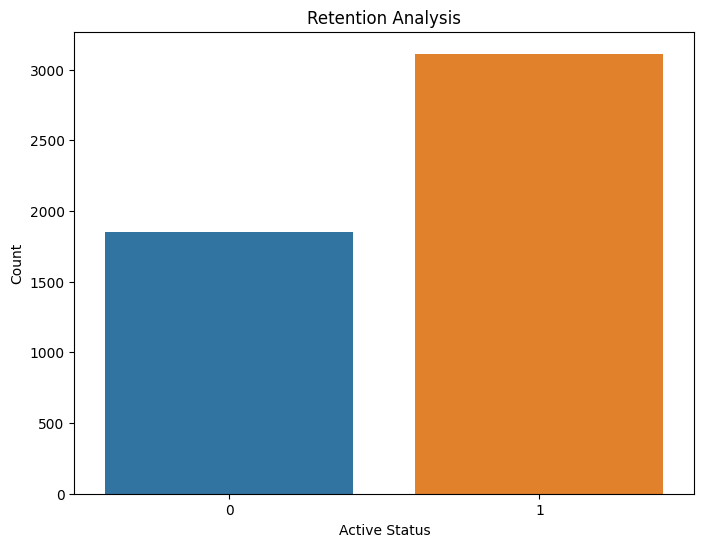

In [66]:
# Menampilkan visualisasi analisis retensi
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Active Status')
plt.title('Retention Analysis')
plt.xlabel('Active Status')
plt.ylabel('Count')
plt.show()

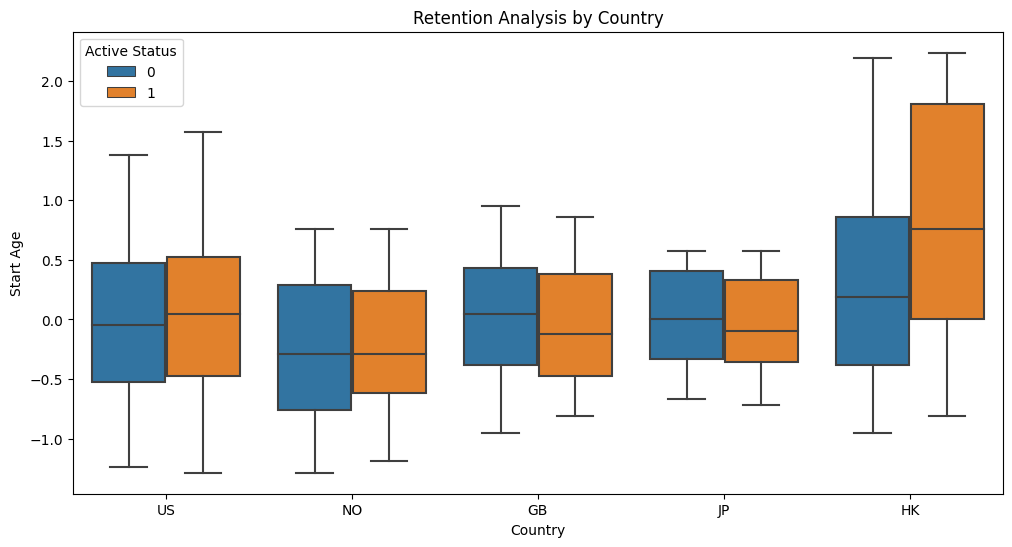

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Country', y='StartAge', hue='Active Status')
plt.title('Retention Analysis by Country')
plt.xlabel('Country')
plt.ylabel('Start Age')
plt.show()


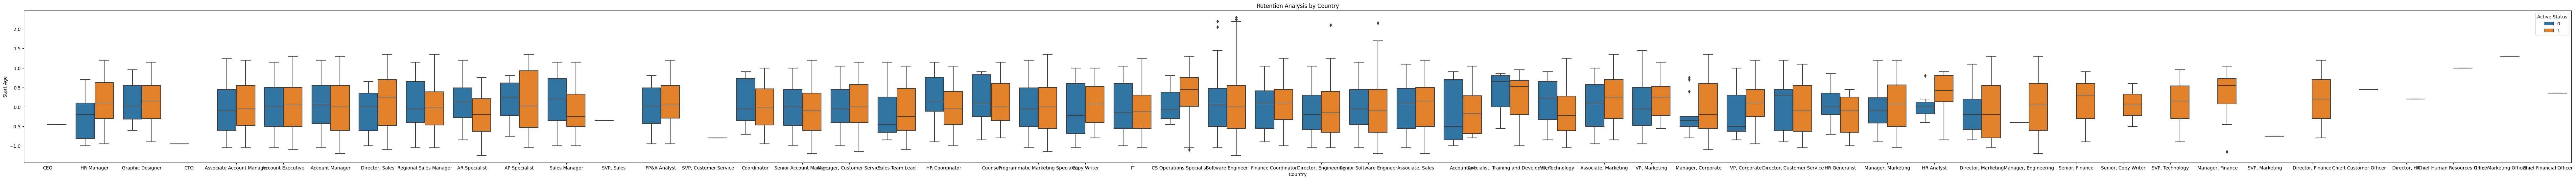

In [95]:
plt.figure(figsize=(100, 6))
sns.boxplot(data=data, x='Job_title', y='Age', hue='Active Status')
plt.title('Retention Analysis by Country')
plt.xlabel('Country')
plt.ylabel('Start Age')
plt.show()


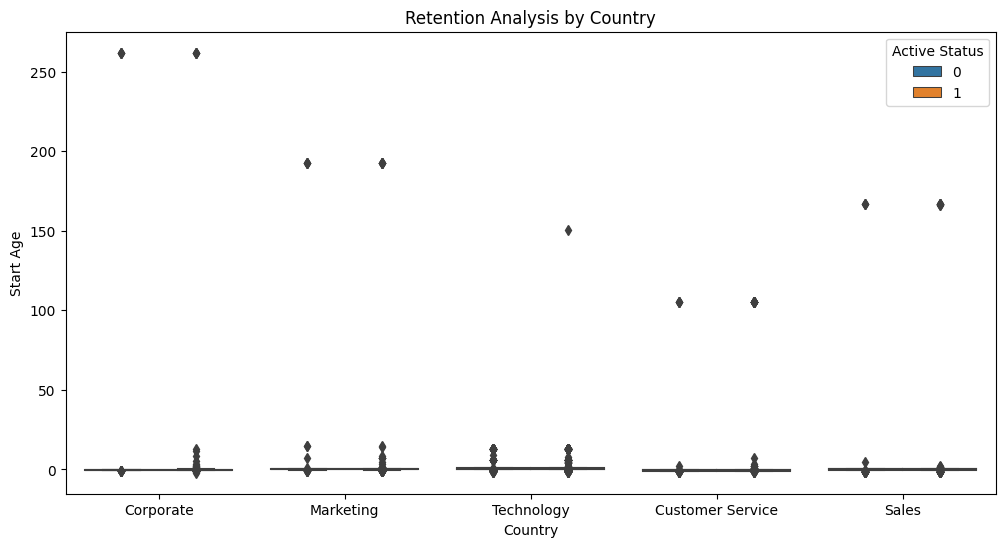

In [101]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Department', y='Salary', hue='Active Status')
plt.title('Retention Analysis by Country')
plt.xlabel('Country')
plt.ylabel('Start Age')
plt.show()

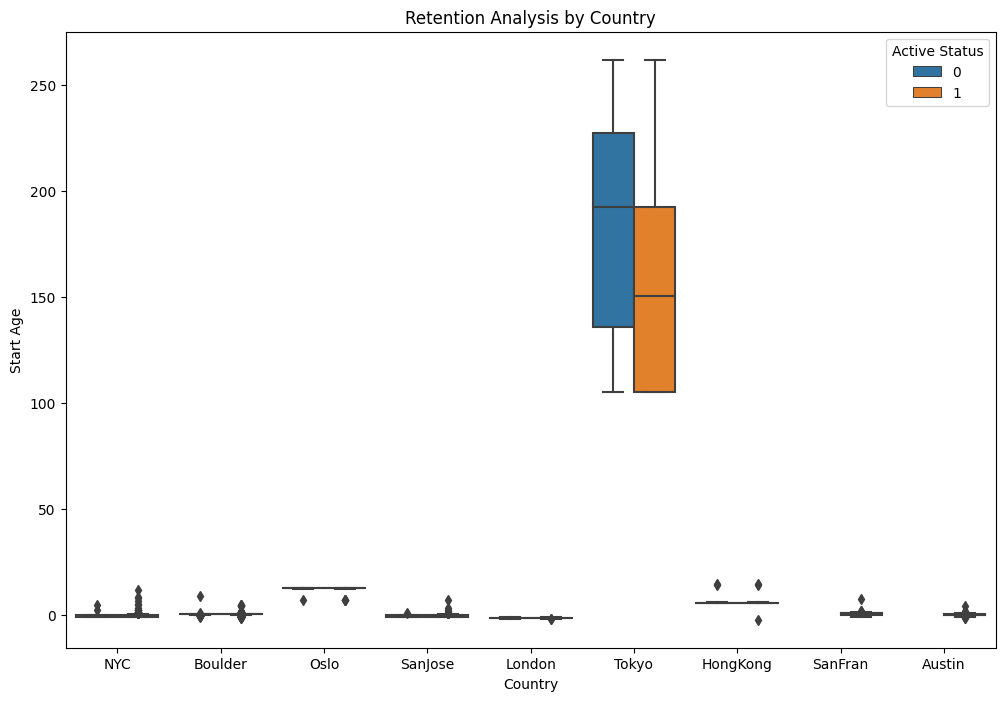

In [105]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Office', y='Salary', hue='Active Status')
plt.title('Retention Analysis by Country')
plt.xlabel('Country')
plt.ylabel('Start Age')
plt.show()

## Summary

In [90]:
data[['Age','Active Status']].groupby('Active Status').describe()

Age                                               
                count      mean       std   min   25%  50%  75%  max
Active Status                                                       
0              1855.0  0.008248  0.588055 -1.05 -0.50  0.0  0.5  2.2
1              3113.0  0.010039  0.635893 -1.25 -0.55  0.0  0.5  2.3

In [91]:
data[['Salary','Active Status']].groupby('Active Status').describe()

Salary                                                     \
                count      mean        std       min       25%       50%   
Active Status                                                              
0              1855.0  1.836981  17.276470 -1.611111 -0.527778  0.000000   
1              3113.0  2.198463  17.055663 -2.055556 -0.472222  0.027778   

                                     
                    75%         max  
Active Status                        
0              0.472222  261.777778  
1              0.527778  261.805556

In [92]:
data[['StartAge','Active Status']].groupby('Active Status').describe()

StartAge                                                   \
                 count      mean       std       min      25%       50%   
Active Status                                                             
0              1855.0  -0.023771  0.574208 -1.285714 -0.52381 -0.047619   
1              3113.0   0.048154  0.625408 -1.285714 -0.47619  0.000000   

                                   
                    75%       max  
Active Status                      
0              0.428571  2.190476  
1              0.523810  2.238095

# Classification Prediction

In [181]:
data.head()

,Country,Age,Office,Office_Type,Department,Currency,Bonus_pct,Job_title,level,Salary,Job_Profile,Old,Active Status
0,US,35,NYC,Corporate,Corporate,USD,1.00,CEO,CSuite,500000,JP_1000,23,1
1,US,49,NYC,Corporate,Corporate,USD,0.20,HR Manager,Manager,70000,JP_1001,38,1
2,US,32,NYC,Corporate,Marketing,USD,0.15,Graphic Designer,Individual Contributor,77000,JP_1022,20,0
3,US,25,Boulder,Corporate,Technology,USD,0.50,CTO,CSuite,400000,JP_1036,13,0
4,US,49,NYC,Corporate,Customer Service,USD,0.15,Associate Account Manager,Manager,51000,JP_1015,37,0


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4968 entries, 0 to 4967
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        4968 non-null   object 
 1   Age            4968 non-null   int64  
 2   Office         4968 non-null   object 
 3   Office_Type    4968 non-null   object 
 4   Department     4968 non-null   object 
 5   Currency       4968 non-null   object 
 6   Bonus_pct      4968 non-null   float64
 7   Job_title      4968 non-null   object 
 8   level          4968 non-null   object 
 9   Salary         4968 non-null   int64  
 10  Job_Profile    4968 non-null   object 
 11  Old            4968 non-null   int64  
 12  Active Status  4968 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 543.4+ KB


In [191]:
# Mendefinisikan kolom-kolom yang perlu dilakukan label encoding
categorical_columns = ['Country', 'Office', 'Office_Type', 'Department', 'Currency', 'level', 'Job_Profile', 'Job_title']

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada setiap kolom kategorikal
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [192]:
# # Mendefinisikan kolom-kolom yang perlu dinormalisasi
# numeric_columns = ['Age', 'Salary', 'Old']

# # Membuat objek RobustScaler
# scaler = RobustScaler()

# # Melakukan normalisasi pada setiap kolom numerik
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [193]:
# Memisahkan variabel target (Active Status) dari fitur lainnya
X = data.drop('Active Status', axis=1)
y = data['Active Status']

In [194]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
# Tentukan hyperparameter yang akan diuji
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1100, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [202]:
# Buat objek RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Buat objek RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Lakukan training model dengan GridSearchCV
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 21, 32, 43, 54, 65,
                                                      76, 87, 98, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700, 800, 900,
                                                         1000, 1100]},
                   random_state=42, verbose=2)

In [203]:
# Cetak hyperparameter terbaik dan akurasi model
print("Hyperparameter terbaik: ", random_search.best_params_)
print("Akurasi terbaik: ", random_search.best_score_)

Hyperparameter terbaik:  {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Akurasi terbaik:  0.629339543431079


In [204]:
rfc = RandomForestClassifier(random_state = 42, n_estimators = 500, min_samples_split = 10, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 10, verbose=1, n_jobs=-1)

rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=42, verbose=1)

In [205]:
y_pred = rfc.predict(X_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.0s finished


In [206]:
# Memprediksi kelas (0 atau 1) untuk data uji
y_pred = model.predict(X_test)

In [207]:
# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


In [209]:

print(classification_report(y_test, y_pred))                    

              precision    recall  f1-score   support

           0       0.44      0.35      0.39       389
           1       0.63      0.71      0.67       605

    accuracy                           0.57       994
   macro avg       0.53      0.53      0.53       994
weighted avg       0.55      0.57      0.56       994

